In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

plt.rcParams['figure.figsize'] = 10, 10


In [2]:
drawing=False # true if mouse is pressed
mode=True # if True, draw rectangle. Press 'm' to toggle to curve
size = 25
color = (255,255,255)

In [3]:
def draw_on_image_from_path(image_path):
    
    def drawing_tool(event,former_x,former_y,flags,param):
        global current_former_x,current_former_y,drawing, mode, size, color

        if event==cv2.EVENT_LBUTTONDOWN:
            drawing=True
            current_former_x,current_former_y=former_x,former_y

        elif event==cv2.EVENT_MOUSEMOVE:
            if drawing==True:
                if mode==True:
                    cv2.line(im,(current_former_x,current_former_y),(former_x,former_y),color,size)
                    cv2.line(mask,(current_former_x,current_former_y),(former_x,former_y),color,size)

                    current_former_x = former_x
                    current_former_y = former_y
                    #print former_x,former_y
        elif event==cv2.EVENT_LBUTTONUP:
            drawing=False
            if mode==True:
                cv2.line(im,(current_former_x,current_former_y),(former_x,former_y),color,size)
                cv2.line(mask,(current_former_x,current_former_y),(former_x,former_y),color,size)

                current_former_x = former_x
                current_former_y = former_y
        return former_x,former_y    

    
    im = cv2.imread(image_path, 0)
    mask = np.zeros(im.shape)
    cv2.namedWindow("poor_man\'s_photoshop [Press ESC to exit window]")
    cv2.setMouseCallback('poor_man\'s_photoshop [Press ESC to exit window]',drawing_tool)
    
    while(1):
        cv2.imshow('poor_man\'s_photoshop [Press ESC to exit window]',im)
        k=cv2.waitKey(1)&0xFF
        if k==27:
            break
    cv2.destroyAllWindows()
    return im, mask

In [12]:
im, mask = draw_on_image_from_path("data/original_images/sample.jpg")

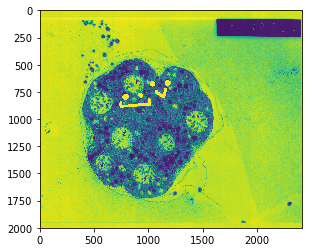

In [13]:
plt.imshow(im)

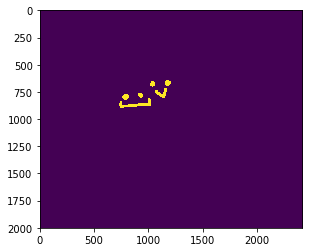

In [14]:
plt.imshow(mask)